In [ ]:
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = "/content/gdrive/MyDrive/Magistrale/Stage/data"
drive.mount("/content/gdrive")
results = pd.read_csv(path + "/all_epochs_nn_approach.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
results.shape

(820, 16)

In [ ]:
results.head()

,Unnamed: 0,df,set,#_fold,#_iteration,#_epoch,loss,acc,acc2,recall,recall2,precision,precision2,f2,f3,tnr
0,0,copd,train,1.0,1.0,1.0,0.080,67.65,66.70,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1,1,copd,validation,1.0,1.0,1.0,0.071,89.58,87.58,0.00,0.00,0.00,0.00,0.00,0.00,100.00
2,2,copd,train,1.0,1.0,2.0,0.066,75.37,74.65,45.52,51.70,50.39,51.70,43.10,44.07,86.10
3,3,copd,validation,1.0,1.0,2.0,0.055,79.69,75.78,55.24,80.00,23.56,80.00,42.95,48.23,75.18
4,4,copd,train,1.0,1.0,3.0,0.047,84.10,83.63,76.34,78.98,68.36,78.98,73.43,74.78,85.96


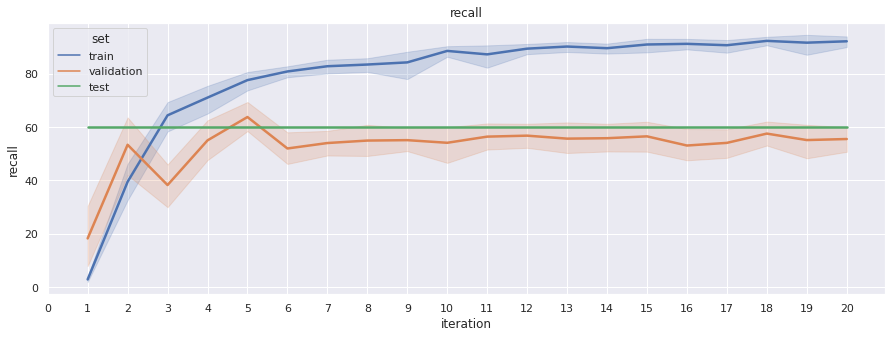

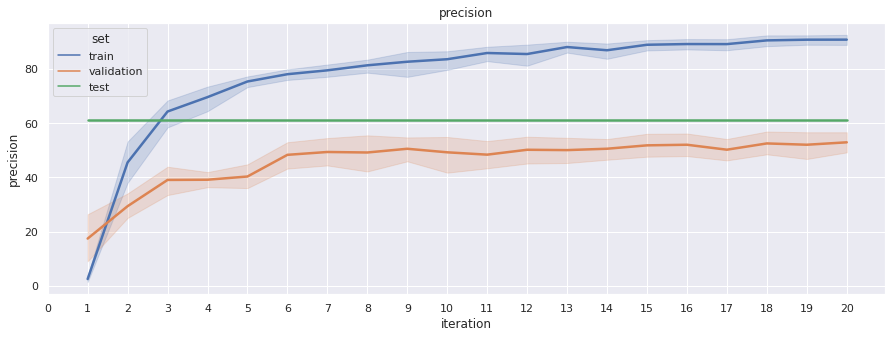

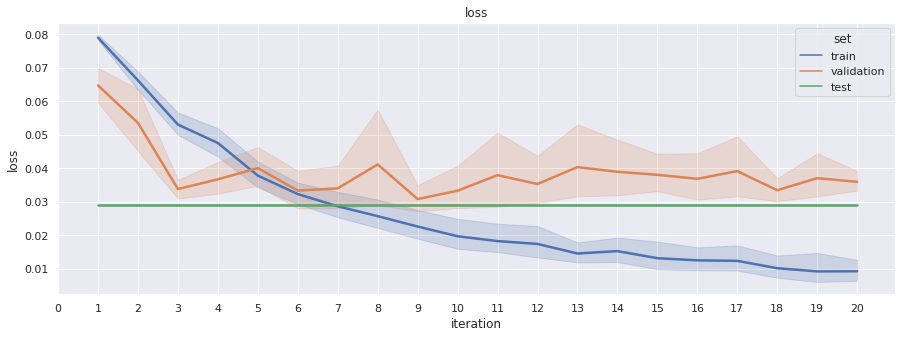

In [ ]:
n_epochs = 20

for m in ["recall", "precision", "loss"]: #for every metric

  y = results[["set", "#_epoch" , m]]
  y.rename(columns={"#_epoch" : "iteration"}, inplace=True)

  y.loc[y["set"]=="test", "iteration"] = list(range(1,n_epochs+1))
  y.loc[y["set"]=="test", m] = round(y.loc[y["set"] == "test", m].mean(), 3)

  #plot
      
  sns.set(rc = {'figure.figsize':(15,5)})
  plt.figure()
  y = y.sort_values(by=['iteration'])
  g = sns.lineplot(data=y, x="iteration", y=m, hue="set", linewidth=2.5).set(title=m)
  plt.xticks(range(0, n_epochs+1), range(0, n_epochs+1))

---

In [ ]:
n_epochs = 20 

new_results = round(results.groupby(["set", "#_epoch"]).mean(), 3)
new_results.reset_index(level=0, inplace=True)
new_results.reset_index(level=0, inplace=True)

x = round(new_results[new_results["set"] == "test"].mean(), 3)
x = pd.DataFrame(x).T
x["set"] = "test"

new_results.drop(new_results[new_results["set"]=="test"].index, inplace=True)
new_results.reset_index(level=0, inplace=True)

x = x.append([x]*(n_epochs-1), ignore_index=True)

new_results = pd.concat([new_results, x], axis=0)
new_results.head()

,index,#_epoch,set,Unnamed: 0,#_fold,#_iteration,loss,acc,acc2,recall,recall2,precision,precision2,f2,f3,tnr
0,11.0,1.0,train,389.5,5.5,1.5,0.079,66.972,66.004,2.876,2.940,2.478,2.940,2.312,2.534,97.489
1,12.0,2.0,train,391.5,5.5,1.5,0.066,74.210,73.452,39.467,42.160,45.482,42.160,37.900,38.496,89.078
2,13.0,3.0,train,393.5,5.5,1.5,0.053,80.640,80.071,64.356,66.876,64.249,66.876,61.708,62.788,86.660
3,14.0,4.0,train,395.5,5.5,1.5,0.048,84.091,83.623,70.989,73.508,69.556,73.508,68.429,69.509,88.674
4,15.0,5.0,train,397.5,5.5,1.5,0.038,87.739,87.378,77.540,81.038,75.322,81.038,75.044,76.099,90.546


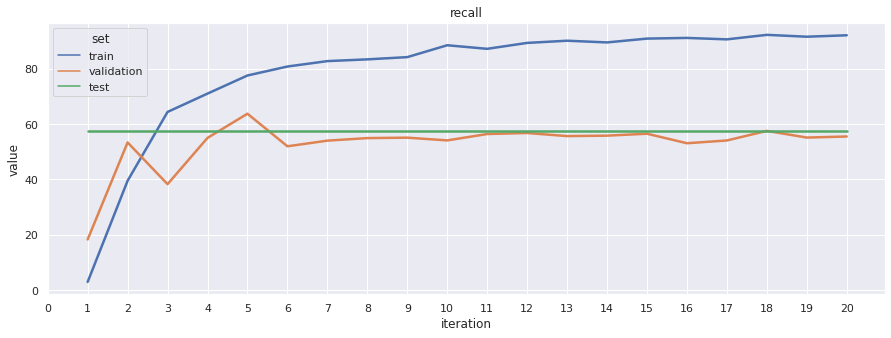

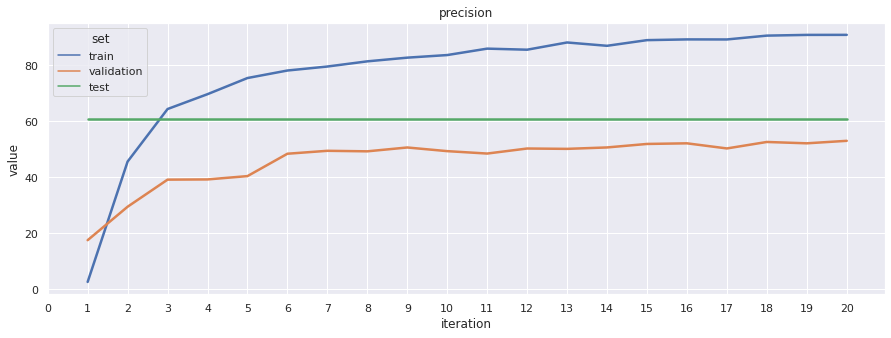

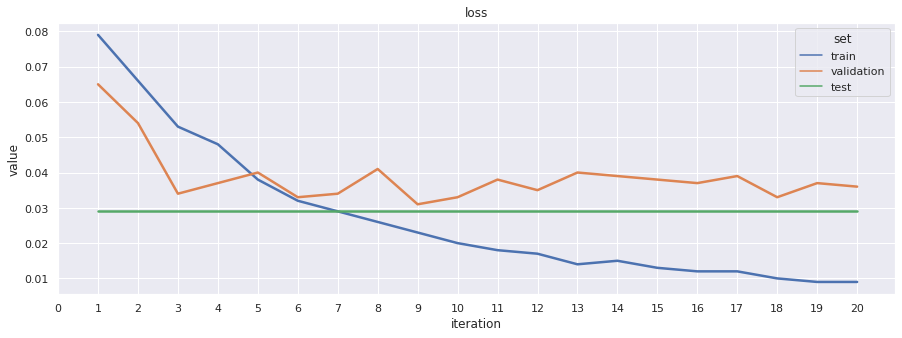

In [ ]:
for m in ["recall", "precision", "loss"]: #for every metric

  data = pd.DataFrame()

  for j in new_results["set"].unique(): #for every set

    #better display of results

    y = new_results.loc[(new_results["set"]==j),  ["set", "#_epoch"]]
    y["value"] = new_results.loc[(new_results["set"]==j), m]
    y["set"] = j
    
    if j == "test": 
        y["iteration"] = list(range(1,n_epochs+1))
    else: 
        y["iteration"] = y["#_epoch"].astype(int)

    data = pd.concat([data, y], axis=0)

  data.drop("#_epoch", 1, inplace=True)

  data= data.reset_index(drop=True)

  #plot
      
  sns.set(rc = {'figure.figsize':(15,5)})
  plt.figure()
  data = data.sort_values(by=['iteration'])
  g = sns.lineplot(data=data, x="iteration", y="value", hue="set", linewidth=2.5).set(title=m)
  plt.xticks(range(0, n_epochs+1), range(0, n_epochs+1))

In [ ]:
# data